# Byte-Pair Encoding (BPE) Applied to 1) Short Stories, 2) Programming Languages, 3) News Articles, 4) GPT-2 Generated vs. Human Written Text

This notebook contains the following:
* Two BPE algorithms, with the first being the initial algorithm coded (slow, inefficient, and does not follow the procedure of byte-pair encoding from start to finish), while the second is cleaner and faster
  * The second algorithm was used for all plots created.
  * Both algorithms take in a string as input, but:
    * The first algorithm returns the tokenization, while the second outputs the distinct & total number of tokens in separate lists to be used for plotting.

* Plots for various experimentations, including:
  * A text and its reverse
  * A text and its translations into different languages
  * A text's introduction vs. middle vs. conclusion
  * A text vs. GPT-2 created text with a similar plotline
  * Programs in different coding languages

* All plots can be also be found in the 2021 SHTEM drive folder.

# BPE First Try (for reference)

In [6]:
def byte_pair_encoding(string):
  output = []
  i = 0
  while i < len(string):
    for j in range(len(string), i, -1):
      if string.count(string[i:j]) > 1:
        output += [string[i:j]]
        i = j
        break
    else:
      output += string[i:j]
      i += 1

  return output

byte_pair_encoding('hello chello bellow mellow')

['hello ', 'c', 'hello ', 'b', 'ellow', ' ', 'm', 'ellow']

# BPE Second Try (use)

In [10]:
def get_words(filename):
  with open(filename, 'r') as f:
    data = f.read().replace('\n', ' ')
  return data
  
get_words('ai-generated.txt')

'In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.  The scientist named the population, after their distinctive horn, Ovid’s Unicorn. These four-horned, silver-white unicorns were previously unknown to science.  Now, after almost two centuries, the mystery of what sparked this odd phenomenon is finally solved.  Dr. Jorge Pérez, an evolutionary biologist from the University of La Paz, and several companions, were exploring the Andes Mountains when they found a small valley, with no other animals or humans. Pérez noticed that the valley had what appeared to be a natural fountain, surrounded by two peaks of rock and silver snow.  Pérez and the others then ventured further into the valley. “By the time we reached the top of one peak, the water looked blue, with some crystals on top,” said Pérez.  Pérez and his f

In [4]:
from collections import Counter


# getting total number & distinct number of tokens
def get_length_of_tok(pairing, x_data, y_data):
    new_li = list((list(zip(*pairing))).pop(0))
    # finding total number of tokens
    y_data.append(len(new_li))
    # filtering repeated tokens
    dis = []
    for i in new_li:
        if i not in dis:
            dis.append(i)
    # adding distinct tokens to the list
    x_data.append(len(dis))


# finding pairs of tokens and merging them
def combine(string, x_data, y_data):
    i = 0
    output = []
    if len(string) <= 1:
        return string
    # adding all possible consecutive pairs into tuples
    first_item = list(zip(string, string[1:]))
    second_item = [(string[-1], '')]
    pairing = first_item + second_item
    get_length_of_tok(pairing, x_data, y_data)
    get_pairs = (Counter(pairing)).items()
    # find tuples that occur more than once in the list
    try:
        a, b = next(j for j, num in get_pairs if num > 1)
    except StopIteration:
        return string
    while i < len(pairing):
        d, e = pairing[i]
        # find pairs of items that occur more than once
        # if they do occur multiple times, merge
        # otherwise, add the first item in the tuple pair
        if d + e == a + b:
            output.append(d + e)
            i = i + 2
        else:
            output.append(d)
            i = i + 1
    return output


# iterating over the list to find tokens multiple times (calling combine(string, x_data, y_data) in a loop)
def combine_items(string):
    x_data = []
    y_data = []
    com = combine(string, x_data, y_data)
    while com != string:
        string = com
        com = combine(string, x_data, y_data)
    return x_data, y_data

# print(combine_items(get_words('ai-generated.txt')))

print(combine_items("hello hello there"))

([7, 7, 8, 7, 6, 5], [17, 14, 12, 10, 8, 6])


# Plotting

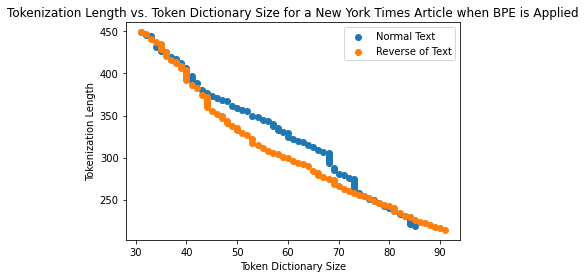

In [ ]:
import matplotlib.pyplot as plt

# from https://www.nytimes.com/2021/07/21/insider/covid-icu-ecmo-photographer.html, middle of text

s = "I felt privileged to be let into these sacred spaces. As a journalist, I feel it is my responsibility to have the emotional bandwidth to be with people in moments that most of society cannot handle. Despite safety guidelines that advised against spending long periods inside ICU rooms, I spent hours with each patient, lingering for an extended amount of time to be able to get a sense of the person and bring forth an emotional spectrum of moments."
reverse_s = s[(len(s))::-1]

l = list(merge_items(s))
x1 = l[0]
y1 = l[1]

plt.scatter(x1, y1, label = 'Normal Text')


l = list(merge_items(reverse_s))
x2 = l[0]
y2 = l[1]

plt.scatter(x2, y2, label = 'Reverse of Text')

plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title('Tokenization Length vs. Token Dictionary Size for a New York Times Article when BPE is Applied')
plt.legend()
plt.show()

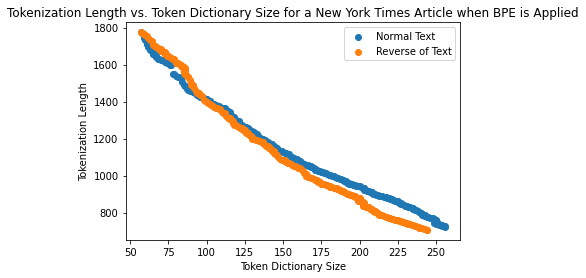

In [ ]:
import matplotlib.pyplot as plt

# from https://www.nytimes.com/2021/07/21/insider/covid-icu-ecmo-photographer.html
s = """
As I photographed people in Covid-19 intensive care units early this year, I was protected by four sets of plastic: glasses, goggles, face shield and viewfinder. But there is no protection for the pain one takes in.

I captured images for a recent Times article about a last-resort Covid treatment called ECMO, documenting coronavirus patients and the medical professionals caring for them at Providence Saint John’s Health Center in Santa Monica, Calif. The families allowed me to share in the darkest moments of their lives.

I felt privileged to be let into these sacred spaces. As a journalist, I feel it is my responsibility to have the emotional bandwidth to be with people in moments that most of society cannot handle. Despite safety guidelines that advised against spending long periods inside ICU rooms, I spent hours with each patient, lingering for an extended amount of time to be able to get a sense of the person and bring forth an emotional spectrum of moments.

Verbal interaction helps me connect with those I photograph. On this assignment, some people were not awake or couldn’t speak, and the most powerful connection was often silent.

I would stand next to the bed of Alfred Sablan, 25, and imagine the sound of his voice, trying to sense the gentle manner his mother described. I would lean over the bed of Dr. David Gutierrez, 62, a physician who had become a patient himself, and remind him who I was. He would look back, unable to respond with words, but I felt our connection over the classic rock playing on his iPad.

Periodically, a staff member would enter to check on Mr. Sablan or Dr. Gutierrez. “Are you OK?” asked a nurse as she cracked the door of Dr. Gutierrez’s room. He nodded “yes.”

Amid all the pain, there were reminders of grace."""

reverse_s = s[(len(s))::-1]

l = list(merge_items(s))
x1 = l[0]
y1 = l[1]

plt.scatter(x1, y1, label = 'Normal Text')


l = list(merge_items(reverse_s))
x2 = l[0]
y2 = l[1]

plt.scatter(x2, y2, label = 'Reverse of Text')

plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title('Tokenization Length vs. Token Dictionary Size for a New York Times Article when BPE is Applied')
plt.legend()
plt.show()

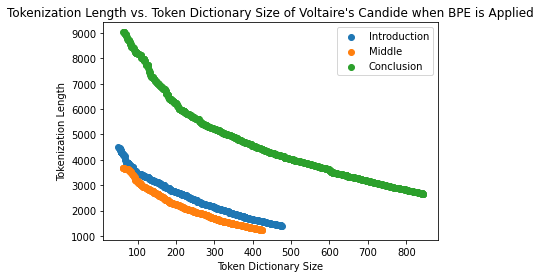

In [ ]:
import matplotlib.pyplot as plt

# from https://www.gutenberg.org/cache/epub/19942/pg19942.txt
intro = """In a castle of Westphalia, belonging to the Baron of
Thunder-ten-Tronckh, lived a youth, whom nature had endowed with the
most gentle manners. His countenance was a true picture of his soul. He
combined a true judgment with simplicity of spirit, which was the
reason, I apprehend, of his being called Candide. The old servants of
the family suspected him to have been the son of the Baron's sister, by
a good, honest gentleman of the neighborhood, whom that young lady would
never marry because he had been able to prove only seventy-one
quarterings, the rest of his genealogical tree having been lost through
the injuries of time.

The Baron was one of the most powerful lords in Westphalia, for his
castle had not only a gate, but windows. His great hall, even, was hung
with tapestry. All the dogs of his farm-yards formed a pack of hounds at
need; his grooms were his huntsmen; and the curate of the village was
his grand almoner. They called him "My Lord," and laughed at all his
stories.

The Baron's lady weighed about three hundred and fifty pounds, and was
therefore a person of great consideration, and she did the honours of
the house with a dignity that commanded still greater respect. Her
daughter Cunegonde was seventeen years of age, fresh-coloured, comely,
plump, and desirable. The Baron's son seemed to be in every respect
worthy of his father. The Preceptor Pangloss[1] was the oracle of the
family, and little Candide heard his lessons with all the good faith of
his age and character.

Pangloss was professor of metaphysico-theologico-cosmolo-nigology. He
proved admirably that there is no effect without a cause, and that, in
this best of all possible worlds, the Baron's castle was the most
magnificent of castles, and his lady the best of all possible
Baronesses.

"It is demonstrable," said he, "that things cannot be otherwise than as
they are; for all being created for an end, all is necessarily for the
best end. Observe, that the nose has been formed to bear
spectacles--thus we have spectacles. Legs are visibly designed for
stockings--and we have stockings. Stones were made to be hewn, and to
construct castles--therefore my lord has a magnificent castle; for the
greatest baron in the province ought to be the best lodged. Pigs were
made to be eaten--therefore we eat pork all the year round. Consequently
they who assert that all is well have said a foolish thing, they should
have said all is for the best."

Candide listened attentively and believed innocently; for he thought
Miss Cunegonde extremely beautiful, though he never had the courage to
tell her so. He concluded that after the happiness of being born of
Baron of Thunder-ten-Tronckh, the second degree of happiness was to be
Miss Cunegonde, the third that of seeing her every day, and the fourth
that of hearing Master Pangloss, the greatest philosopher of the whole
province, and consequently of the whole world.

One day Cunegonde, while walking near the castle, in a little wood which
they called a park, saw between the bushes, Dr. Pangloss giving a lesson
in experimental natural philosophy to her mother's chamber-maid, a
little brown wench, very pretty and very docile. As Miss Cunegonde had a
great disposition for the sciences, she breathlessly observed the
repeated experiments of which she was a witness; she clearly perceived
the force of the Doctor's reasons, the effects, and the causes; she
turned back greatly flurried, quite pensive, and filled with the desire
to be learned; dreaming that she might well be a _sufficient reason_ for
young Candide, and he for her.

She met Candide on reaching the castle and blushed; Candide blushed
also; she wished him good morrow in a faltering tone, and Candide spoke
to her without knowing what he said. The next day after dinner, as they
went from table, Cunegonde and Candide found themselves behind a screen;
Cunegonde let fall her handkerchief, Candide picked it up, she took him
innocently by the hand, the youth as innocently kissed the young lady's
hand with particular vivacity, sensibility, and grace; their lips met,
their eyes sparkled, their knees trembled, their hands strayed. Baron
Thunder-ten-Tronckh passed near the screen and beholding this cause and
effect chased Candide from the castle with great kicks on the backside;
Cunegonde fainted away; she was boxed on the ears by the Baroness, as
soon as she came to herself; and all was consternation in this most
magnificent and most agreeable of all possible castles. """

middle = """IN WHAT DISTRESS CANDIDE, CUNEGONDE, AND THE OLD WOMAN ARRIVED AT CADIZ;
AND OF THEIR EMBARKATION.


"Who was it that robbed me of my money and jewels?" said Cunegonde, all
bathed in tears. "How shall we live? What shall we do? Where find
Inquisitors or Jews who will give me more?"

"Alas!" said the old woman, "I have a shrewd suspicion of a reverend
Grey Friar, who stayed last night in the same inn with us at Badajos.
God preserve me from judging rashly, but he came into our room twice,
and he set out upon his journey long before us."

"Alas!" said Candide, "dear Pangloss has often demonstrated to me that
the goods of this world are common to all men, and that each has an
equal right to them. But according to these principles the Grey Friar
ought to have left us enough to carry us through our journey. Have you
nothing at all left, my dear Cunegonde?"

"Not a farthing," said she.

"What then must we do?" said Candide.

"Sell one of the horses," replied the old woman. "I will ride behind
Miss Cunegonde, though I can hold myself only on one buttock, and we
shall reach Cadiz."

In the same inn there was a Benedictine prior who bought the horse for a
cheap price. Candide, Cunegonde, and the old woman, having passed
through Lucena, Chillas, and Lebrixa, arrived at length at Cadiz. A
fleet was there getting ready, and troops assembling to bring to reason
the reverend Jesuit Fathers of Paraguay, accused of having made one of
the native tribes in the neighborhood of San Sacrament revolt against
the Kings of Spain and Portugal. Candide having been in the Bulgarian
service, performed the military exercise before the general of this
little army with so graceful an address, with so intrepid an air, and
with such agility and expedition, that he was given the command of a
company of foot. Now, he was a captain! He set sail with Miss Cunegonde,
the old woman, two valets, and the two Andalusian horses, which had
belonged to the grand Inquisitor of Portugal.

During their voyage they reasoned a good deal on the philosophy of poor
Pangloss.

"We are going into another world," said Candide; "and surely it must be
there that all is for the best. For I must confess there is reason to
complain a little of what passeth in our world in regard to both
natural and moral philosophy."

"I love you with all my heart," said Cunegonde; "but my soul is still
full of fright at that which I have seen and experienced."

"All will be well," replied Candide; "the sea of this new world is
already better than our European sea; it is calmer, the winds more
regular. It is certainly the New World which is the best of all possible
worlds."

"God grant it," said Cunegonde; "but I have been so horribly unhappy
there that my heart is almost closed to hope."

"You complain," said the old woman; "alas! you have not known such
misfortunes as mine."

Cunegonde almost broke out laughing, finding the good woman very
amusing, for pretending to have been as unfortunate as she.

"Alas!" said Cunegonde, "my good mother, unless you have been ravished
by two Bulgarians, have received two deep wounds in your belly, have had
two castles demolished, have had two mothers cut to pieces before your
eyes, and two of your lovers whipped at an _auto-da-fé_, I do not
conceive how you could be more unfortunate than I. Add that I was born a
baroness of seventy-two quarterings--and have been a cook!"

"Miss," replied the old woman, "you do not know my birth; and were I to
show you my backside, you would not talk in that manner, but would
suspend your judgment."

This speech having raised extreme curiosity in the minds of Cunegonde
and Candide, the old woman spoke to them as follows.
"""

end = """At the bottom of his heart Candide had no wish to marry Cunegonde. But
the extreme impertinence of the Baron determined him to conclude the
match, and Cunegonde pressed him so strongly that he could not go from
his word. He consulted Pangloss, Martin, and the faithful Cacambo.
Pangloss drew up an excellent memorial, wherein he proved that the Baron
had no right over his sister, and that according to all the laws of the
empire, she might marry Candide with her left hand. Martin was for
throwing the Baron into the sea; Cacambo decided that it would be better
to deliver him up again to the captain of the galley, after which they
thought to send him back to the General Father of the Order at Rome by
the first ship. This advice was well received, the old woman approved
it; they said not a word to his sister; the thing was executed for a
little money, and they had the double pleasure of entrapping a Jesuit,
and punishing the pride of a German baron.

It is natural to imagine that after so many disasters Candide married,
and living with the philosopher Pangloss, the philosopher Martin, the
prudent Cacambo, and the old woman, having besides brought so many
diamonds from the country of the ancient Incas, must have led a very
happy life. But he was so much imposed upon by the Jews that he had
nothing left except his small farm; his wife became uglier every day,
more peevish and unsupportable; the old woman was infirm and even more
fretful than Cunegonde. Cacambo, who worked in the garden, and took
vegetables for sale to Constantinople, was fatigued with hard work, and
cursed his destiny. Pangloss was in despair at not shining in some
German university. For Martin, he was firmly persuaded that he would be
as badly off elsewhere, and therefore bore things patiently. Candide,
Martin, and Pangloss sometimes disputed about morals and metaphysics.
They often saw passing under the windows of their farm boats full of
Effendis, Pashas, and Cadis, who were going into banishment to Lemnos,
Mitylene, or Erzeroum. And they saw other Cadis, Pashas, and Effendis
coming to supply the place of the exiles, and afterwards exiled in their
turn. They saw heads decently impaled for presentation to the Sublime
Porte. Such spectacles as these increased the number of their
dissertations; and when they did not dispute time hung so heavily upon
their hands, that one day the old woman ventured to say to them:

"I want to know which is worse, to be ravished a hundred times by negro
pirates, to have a buttock cut off, to run the gauntlet among the
Bulgarians, to be whipped and hanged at an _auto-da-fé_, to be
dissected, to row in the galleys--in short, to go through all the
miseries we have undergone, or to stay here and have nothing to do?"

"It is a great question," said Candide.

This discourse gave rise to new reflections, and Martin especially
concluded that man was born to live either in a state of distracting
inquietude or of lethargic disgust. Candide did not quite agree to that,
but he affirmed nothing. Pangloss owned that he had always suffered
horribly, but as he had once asserted that everything went wonderfully
well, he asserted it still, though he no longer believed it.

What helped to confirm Martin in his detestable principles, to stagger
Candide more than ever, and to puzzle Pangloss, was that one day they
saw Paquette and Friar Giroflée land at the farm in extreme misery. They
had soon squandered their three thousand piastres, parted, were
reconciled, quarrelled again, were thrown into gaol, had escaped, and
Friar Giroflée had at length become Turk. Paquette continued her trade
wherever she went, but made nothing of it.

"I foresaw," said Martin to Candide, "that your presents would soon be
dissipated, and only make them the more miserable. You have rolled in
millions of money, you and Cacambo; and yet you are not happier than
Friar Giroflée and Paquette."

"Ha!" said Pangloss to Paquette, "Providence has then brought you
amongst us again, my poor child! Do you know that you cost me the tip of
my nose, an eye, and an ear, as you may see? What a world is this!"

And now this new adventure set them philosophising more than ever.

In the neighbourhood there lived a very famous Dervish who was esteemed
the best philosopher in all Turkey, and they went to consult him.
Pangloss was the speaker.

"Master," said he, "we come to beg you to tell why so strange an animal
as man was made."

"With what meddlest thou?" said the Dervish; "is it thy business?"

"But, reverend father," said Candide, "there is horrible evil in this
world."

"What signifies it," said the Dervish, "whether there be evil or good?
When his highness sends a ship to Egypt, does he trouble his head
whether the mice on board are at their ease or not?"

"What, then, must we do?" said Pangloss.

"Hold your tongue," answered the Dervish.

"I was in hopes," said Pangloss, "that I should reason with you a little
about causes and effects, about the best of possible worlds, the origin
of evil, the nature of the soul, and the pre-established harmony."

At these words, the Dervish shut the door in their faces.

During this conversation, the news was spread that two Viziers and the
Mufti had been strangled at Constantinople, and that several of their
friends had been impaled. This catastrophe made a great noise for some
hours. Pangloss, Candide, and Martin, returning to the little farm, saw
a good old man taking the fresh air at his door under an orange bower.
Pangloss, who was as inquisitive as he was argumentative, asked the old
man what was the name of the strangled Mufti.

"I do not know," answered the worthy man, "and I have not known the name
of any Mufti, nor of any Vizier. I am entirely ignorant of the event you
mention; I presume in general that they who meddle with the
administration of public affairs die sometimes miserably, and that they
deserve it; but I never trouble my head about what is transacting at
Constantinople; I content myself with sending there for sale the fruits
of the garden which I cultivate."

Having said these words, he invited the strangers into his house; his
two sons and two daughters presented them with several sorts of sherbet,
which they made themselves, with Kaimak enriched with the candied-peel
of citrons, with oranges, lemons, pine-apples, pistachio-nuts, and Mocha
coffee unadulterated with the bad coffee of Batavia or the American
islands. After which the two daughters of the honest Mussulman perfumed
the strangers' beards.

"You must have a vast and magnificent estate," said Candide to the Turk.

"I have only twenty acres," replied the old man; "I and my children
cultivate them; our labour preserves us from three great
evils--weariness, vice, and want."

Candide, on his way home, made profound reflections on the old man's
conversation.

"This honest Turk," said he to Pangloss and Martin, "seems to be in a
situation far preferable to that of the six kings with whom we had the
honour of supping."

"Grandeur," said Pangloss, "is extremely dangerous according to the
testimony of philosophers. For, in short, Eglon, King of Moab, was
assassinated by Ehud; Absalom was hung by his hair, and pierced with
three darts; King Nadab, the son of Jeroboam, was killed by Baasa; King
Ela by Zimri; Ahaziah by Jehu; Athaliah by Jehoiada; the Kings
Jehoiakim, Jeconiah, and Zedekiah, were led into captivity. You know how
perished Croesus, Astyages, Darius, Dionysius of Syracuse, Pyrrhus,
Perseus, Hannibal, Jugurtha, Ariovistus, Cæsar, Pompey, Nero, Otho,
Vitellius, Domitian, Richard II. of England, Edward II., Henry VI.,
Richard III., Mary Stuart, Charles I., the three Henrys of France, the
Emperor Henry IV.! You know----"

"I know also," said Candide, "that we must cultivate our garden."

"You are right," said Pangloss, "for when man was first placed in the
Garden of Eden, he was put there _ut operaretur eum_, that he might
cultivate it; which shows that man was not born to be idle."

"Let us work," said Martin, "without disputing; it is the only way to
render life tolerable."

The whole little society entered into this laudable design, according to
their different abilities. Their little plot of land produced plentiful
crops. Cunegonde was, indeed, very ugly, but she became an excellent
pastry cook; Paquette worked at embroidery; the old woman looked after
the linen. They were all, not excepting Friar Giroflée, of some service
or other; for he made a good joiner, and became a very honest man.

Pangloss sometimes said to Candide:

"There is a concatenation of events in this best of all possible worlds:
for if you had not been kicked out of a magnificent castle for love of
Miss Cunegonde: if you had not been put into the Inquisition: if you had
not walked over America: if you had not stabbed the Baron: if you had
not lost all your sheep from the fine country of El Dorado: you would
not be here eating preserved citrons and pistachio-nuts."

"All that is very well," answered Candide, "but let us cultivate our
garden."""

l = list(merge_items(intro))
x1 = l[0]
y1 = l[1]

plt.scatter(x1, y1, label = 'Introduction')

l2 = list(merge_items(middle))
x2 = l2[0]
y2 = l2[1]

plt.scatter(x2, y2, label = 'Middle')

l3 = list(merge_items(end))
x3 = l3[0]
y3 = l3[1]

plt.scatter(x3, y3, label = 'Conclusion')

plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title("Tokenization Length vs. Token Dictionary Size of Voltaire's Candide when BPE is Applied")
plt.legend()
plt.show()

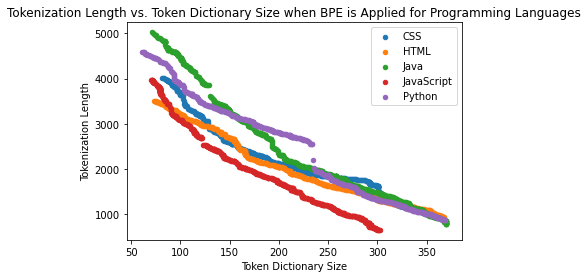

In [8]:
import matplotlib.pyplot as plt

# plotting curve in css
css = get_words('css.txt')

l = list(merge_items(css))
x1 = l[0]
y1 = l[1]

plt.scatter(x1, y1, label = 'CSS', s=20)

# plotting curve in html
html = get_words('html.txt')

l = list(merge_items(html))
x2 = l[0]
y2 = l[1]

plt.scatter(x2, y2, label = 'HTML', s=20)

# plotting curve in french
java = get_words('java.txt')

l3 = list(merge_items(java))
x3 = l3[0]
y3 = l3[1]

plt.scatter(x3, y3, label = 'Java', s=20)

# plotting curve in arabic
js = get_words('js.txt')

l4 = list(merge_items(js))
x4 = l4[0]
y4 = l4[1]

plt.scatter(x4, y4, label = 'JavaScript', s=20)

# plotting curve in italian
py = get_words('py.txt')

l5 = list(merge_items(py))
x5 = l5[0]
y5 = l5[1]

plt.scatter(x5, y5, label = 'Python', s=20)


plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title('Tokenization Length vs. Token Dictionary Size when BPE is Applied for Programming Languages')
plt.legend()
plt.show()

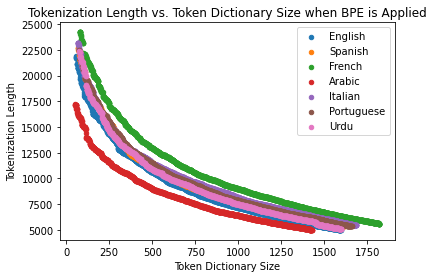

In [14]:
import matplotlib.pyplot as plt

# plotting curve in english
eng = get_words('monkeys_paw.txt')

l = list(merge_items(eng))
x1 = l[0]
y1 = l[1]

plt.scatter(x1, y1, label = 'English', s=20)

# plotting curve in spanish
span = get_words('monkeys-paw-spanish.txt')

l2 = list(merge_items(span))
x2 = l2[0]
y2 = l2[1]

plt.scatter(x2, y2, label = 'Spanish', s=20)

# plotting curve in french
fren = get_words('monkeys-paw-french.txt')

l3 = list(merge_items(fren))
x3 = l3[0]
y3 = l3[1]

plt.scatter(x3, y3, label = 'French', s=20)

# plotting curve in arabic
arabic = get_words('monkeys-paw-arabic.txt')

l4 = list(merge_items(arabic))
x4 = l4[0]
y4 = l4[1]

plt.scatter(x4, y4, label = 'Arabic', s=20)

# plotting curve in italian
ital = get_words('monkeys-paw-italian.txt')

l5 = list(merge_items(ital))
x5 = l5[0]
y5 = l5[1]

plt.scatter(x5, y5, label = 'Italian', s=20)

# plotting curve in portuguese
por = get_words('monkeys-paw-portuguese.txt')

l6 = list(merge_items(por))
x6 = l6[0]
y6 = l6[1]

plt.scatter(x6, y6, label = 'Portuguese', s=20)

# plotting curve in urdu
urdu = get_words('monkeys-paw-urdu.txt')

l7 = list(merge_items(urdu))
x7 = l7[0]
y7 = l7[1]

plt.scatter(x7, y7, label = 'Urdu', s=20)

plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title('Tokenization Length vs. Token Dictionary Size when BPE is Applied')
plt.legend()
plt.show()

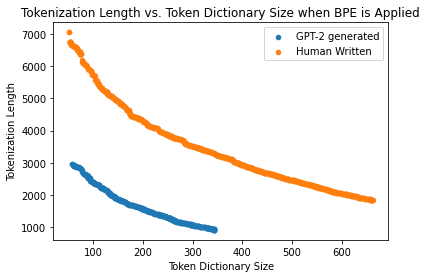

In [12]:
import matplotlib.pyplot as plt

# plotting curve for ai-generated
text = get_words('ai-generated.txt')

l = list(merge_items(text))
x1 = l[0]
y1 = l[1]

plt.scatter(x1, y1, label = 'GPT-2 generated', s=20)

# plotting curve for short story
story = get_words('short-story.txt')

l2 = list(merge_items(story))
x2 = l2[0]
y2 = l2[1]

plt.scatter(x2, y2, label = 'Human Written', s=20)

plt.xlabel('Token Dictionary Size')
plt.ylabel('Tokenization Length')
plt.title('Tokenization Length vs. Token Dictionary Size when BPE is Applied')
plt.legend()
plt.show()